## Introduction 
The Environmental Center at Westminster College has been curious about how to cut down the budget for trash pickups. We chose Ace Recycling and Disposal, Inc to recycle trash in the past few years. We noticed that during certain months in a school year, dumpsters got recycled too often. For example, Janurary is winter break, but the truck still comes to pickup trash twice a week which is not reasonable for a financial wide.

Currently, Westminster College keeps the schedule (pickup twice a week). Howwever, Ace Recycling and Disposal also offers call to pickup next day service. As a Data Analyst at the Environmental Center, I will run some visualizations and analysis to decide whether we should switch the pickup plan or not. Let's get dive into the data to see which plan is better.

In [1]:
# Import some necessary libraries and packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Analysis and Visualization
I cleaned the dataset in Excel before I imported into Jupyter Notebook. Therefore, you can see I used 'Waste 1.csv' and 'Waste 2.csv' two datasets below. They are from the same raw dataset, but I sorted them into different ways. I will also attach my Excel files with this file.

In [19]:
waste_1 = pd.read_csv('Waste 1.csv')
waste_1

,TripDate,Destination,Material,Weight
0,1/7/15,ROCKY MTN,SINGLE STR,0.92
1,1/14/15,ROCKY MTN,SINGLE STR,0.83
2,1/16/15,ROCKY MTN,SINGLE STR,0.40
3,1/19/15,ROCKY MTN,SINGLE STR,0.17
4,1/21/15,ROCKY MTN,SINGLE STR,0.41
...,...,...,...,...
317,12/18/15,ACE INTERM,TRASH,0.08
318,12/21/15,ACE INTERM,TRASH,0.30
319,12/22/15,ACE INTERM,TRASH,0.12
320,12/23/15,ACE INTERM,TRASH,0.29


In [12]:
waste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 4 columns):
TripDate       322 non-null object
Destination    322 non-null object
Material       322 non-null object
Weight         322 non-null float64
dtypes: float64(1), object(3)
memory usage: 10.2+ KB


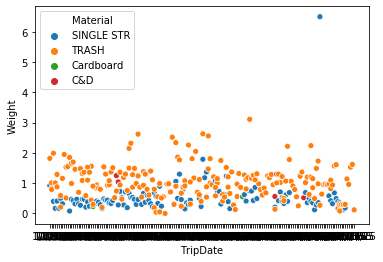

In [20]:
# First of all, I used a scatterplot to show the relationship
sns.scatterplot(x = 'TripDate', y = 'Weight', data = waste_1, hue = 'Material')

As the plot shown above, 'TripDate' was too many to count, so we can see tons of tiny dots clustered together. Even the plot cannot provide me valuable information for the analysis. I still want to put the plot to remind me the importance of data cleaning and sorting. In general, scatter plot is the primary choice for discover the relationship between variables.


In [36]:
waste_2 = pd.read_csv('Waste 2.csv', index_col='Month')
waste_2

,C&D,Cardboard,Single Str,Trash,Grand Total
Month,,,,,
Jan,0.00,0.00,3.72,16.29,20.01
Feb,0.00,0.00,4.13,20.19,24.32
Mar,0.00,0.23,4.02,14.93,19.18
Apr,2.29,0.00,5.65,22.09,30.03
May,0.00,0.00,5.62,17.23,22.85
Jun,0.00,0.00,5.35,19.98,25.33
Jul,0.00,0.00,5.07,15.19,20.26
Aug,0.00,0.85,5.70,16.67,23.22
Sep,0.00,0.55,5.07,20.90,26.52


In [37]:
# I converted four different materials into one category
df = pd.DataFrame({"Material": ["C&D", "Cardboard", "Single Str", "Trash"]})
df

,Material
0,C&D
1,Cardboard
2,Single Str
3,Trash


In [51]:
# I used 'matplotlib' package to plot the second dataset
a = waste_2['C&D']
b = waste_2['Cardboard']
c = waste_2['Single Str']
d = waste_2['Trash']

Text(0.5, 1.0, 'Waste Weight Time Series')

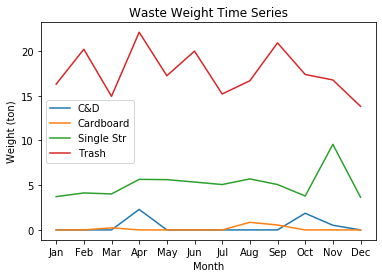

In [61]:
plt.plot(a, label='C&D')
plt.plot(b, label='Cardboard')
plt.plot(c, label='Single Str')
plt.plot(d, label='Trash')

plt.legend(loc='center left')
plt.xlabel('Month')
plt.ylabel('Weight (ton)')
plt.title('Waste Weight Time Series')

From the chart we can see that, Trash is the heaviest garbage in the dumpster. 'Janurary', 'July', 'December' and so on are the lowest weight during this year. Therefore, we assume we don't need truck to come pickup twice a week every month.  



## Calculation
Next step, I will calulate the total weight of each material cause I called Ace Recycling and Disposal, Inc. They told me truck would pickup **70% weight of trash each dumpster and 80% weight of single stream each dumpster everytime**. So we can figure out how many times would school need for the whole year and we can compare with the current price.


In [59]:
# The total weight of trash
trash = waste_2['Trash'].sum()
print(trash)

211.41


In [60]:
# The total weight of single string
single = waste_2['Single Str'].sum()
print(single)

61.33


In [62]:
# The total weight of C&D
CD = waste_2['C&D'].sum()
print(CD)

4.67


In [63]:
# The total weight of Cardboard
card = waste_2['Cardboard'].sum()
print(card)

1.6300000000000001


According to the info from the Environmental Center, we have two 16-yard 3600 pounds (1.8 tons) dumpsters and two 8-yard 1800 pounds (0.9 tons) dumpsters on campus. Since C&D and Cardboard material are very less, we will focus on trash and single stream. Every time you call for a pick up will cost you $ 179.

In [65]:
# How many times we need to pick up the trash
trash_times = 211/(1.8*0.7)
trash_times

167.46031746031747

In [66]:
# How many times we need to pick up the single stream
single_times = 61/(1.8*0.8)
single_times

42.36111111111111

In [68]:
total_times = (trash_times + single_times)
total_times

209.82142857142858

In [74]:
total_cost = 210 * 179
total_cost

37590

## Conclusion
Due to the reponse from the Administration office at Westminster College, we spend **29,500 USD per year** on dumpster pickups currently. The new plan I estimated costs **37,590 USD per year** is more than the old plan. It seems the old plan is much better than the new plan, and we had thinking mistake that call for pickup would be less cost.

Unfortunately, we cannot have the conclusion yet. We still have few more points and aspects to consider. On the one hand, the unit price of dumpster pickup is way higher than the scheduled pickup, so we might have to ask for the price from different companies. Maybe we can find a cheaper price for the service. On the other hand, garbage classification still not implement thoroughly on campus. I observed some students do not follow the garbage classification policy at all, so this maybe another leading cause to the higher price. To improve the problem, we can strengthen the garbage classification education during the school year, especially during the orientation week. Last but not least, sample size is not big enough, so the result may not have the representative of real situation.